In [21]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.efficientnet import EfficientNetB4
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input,Conv2D,Activation,MaxPool2D,Dense,Dropout,GlobalAveragePooling2D,BatchNormalization,Flatten
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session
from tensorflow.keras.utils import plot_model

In [22]:
data_path = "/Users/HP/Documents/Projects/Virtual-Assistant-Referee--/Dataset"
output_path = "/kaggle/working"
input_shape = (256,256)

In [23]:
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2,brightness_range=[1.2,2],
                           horizontal_flip=True,vertical_flip=True,rotation_range=90)
train_data=datagen.flow_from_directory(data_path,batch_size=32,class_mode='binary',subset='training',target_size=input_shape)
val_data=datagen.flow_from_directory(data_path,batch_size=32,class_mode='binary',subset='validation',target_size=input_shape)

Found 968 images belonging to 2 classes.
Found 241 images belonging to 2 classes.


In [24]:
print(train_data.class_indices)
print(val_data.class_indices)

{'Clean_Tackles': 0, 'Fouls': 1}
{'Clean_Tackles': 0, 'Fouls': 1}


In [25]:
# Creating model from scratch:
inputs=Input(shape=(256,256,3))
#Initial Layers of 256 Filters 
x = Conv2D(64,5,padding='same')(inputs)
x = Activation(activation='relu')(x)
x = MaxPool2D(strides=(2,2))(x)
x = Conv2D(64,5,padding='same')(inputs)
x = Activation(activation='relu')(x)
x = MaxPool2D(strides=(2,2))(x)
x = Conv2D(64,5,padding='same')(x)
x = Activation(activation='relu')(x)
x = MaxPool2D(strides=(2,2))(x)
x = Conv2D(64,5,padding='same')(x)
x = Activation(activation='relu')(x)
x = MaxPool2D(strides=(2,2))(x)

 #Decreasing Filters and MAxPool Layers
x = Conv2D(32,3,padding='same',dilation_rate=2)(x)
x = Activation(activation='relu')(x)
# x = BatchNormalization()(x)
x = MaxPool2D(strides=(2,2))(x)
x = Conv2D(16,3,padding='same',dilation_rate=2)(x)
x = Activation(activation='relu')(x)
x = MaxPool2D(strides=(2,2))(x)
# x = BatchNormalization()(x)
x = Conv2D(16,3,padding='same',dilation_rate=2)(x)
x = Activation(activation='relu')(x)
x = MaxPool2D(strides=(2,2))(x)

 #Dense Layers
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(400)(x)
x = Dropout(0.5)(x)
x = Activation(activation='relu')(x)
x = Dense(512)(x)
x = Dropout(0.5)(x)
x = Activation(activation='relu')(x)
x = Dense(400)(x)
x = Dropout(0.5)(x)
x = Activation(activation='relu')(x)
x = Dense(1)(x)

#Output
out = Activation(activation='sigmoid')(x)

# final model:
model = Model(inputs,out,name='BaseModel')

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [26]:
# model.load_weights('/Users/HP/Documents/Projects/Virtual-Assistant-Referee--/weights.h5')

In [27]:
# training model:
es=EarlyStopping(monitor='val_accuracy',patience=7,verbose=0,restore_best_weights=True)
logs=model.fit(train_data,validation_data=val_data,epochs=100,callbacks=[es])

Epoch 1/100
31/31 [==============================] - 65s 2s/step - loss: 0.6940 - accuracy: 0.4835 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 2/100
31/31 [==============================] - 72s 2s/step - loss: 0.6932 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 3/100
31/31 [==============================] - 106s 3s/step - loss: 0.6934 - accuracy: 0.4979 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 4/100
31/31 [==============================] - 93s 3s/step - loss: 0.6954 - accuracy: 0.4638 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 5/100
31/31 [==============================] - 95s 3s/step - loss: 0.6938 - accuracy: 0.5010 - val_loss: 0.6934 - val_accuracy: 0.4938
Epoch 6/100
31/31 [==============================] - 87s 3s/step - loss: 0.6951 - accuracy: 0.4690 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 7/100
31/31 [==============================] - 79s 3s/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 8/100


In [28]:
clear_session()

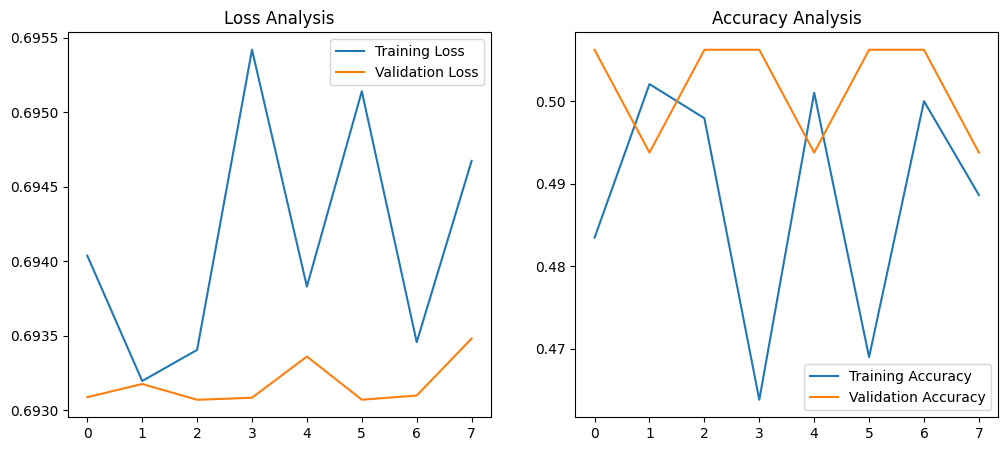

In [29]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(logs.history['loss'], label='Training Loss')
plt.plot(logs.history['val_loss'], label='Validation Loss')
plt.title('Loss Analysis')
plt.legend()
plt.subplot(1,2,2)
plt.plot(logs.history['accuracy'], label='Training Accuracy')
plt.plot(logs.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Analysis')
plt.legend()
plt.show()

In [30]:
model.evaluate(val_data)

8/8 [==============================] - 6s 765ms/step - loss: 0.6931 - accuracy: 0.5062


[0.6930921077728271, 0.5062240958213806]

In [31]:
model.save('/Users/HP/Documents/Projects/Virtual-Assistant-Referee--/weights.h5')

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Final validation accuracy: ~74%